# Pandas Plotting

## Refernces

* [pandas.Series.plot()](https://pandas.pydata.org/docs/reference/api/pandas.Series.plot.html#pandas-series-plot)
* [pandas.DataFrame.plot()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas-dataframe-plot)
* [pandas.Series.dt.to_period()](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.to_period.html#pandas-series-dt-to-period)



In [2]:
# Install datasets Library (if not already installed)
# !pip install datasets

# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

README.md: 0.00B [00:00, ?B/s]

data_jobs.csv:   0%|          | 0.00/231M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/785741 [00:00<?, ? examples/s]

## Series Plot

<class 'pandas.core.series.Series'>


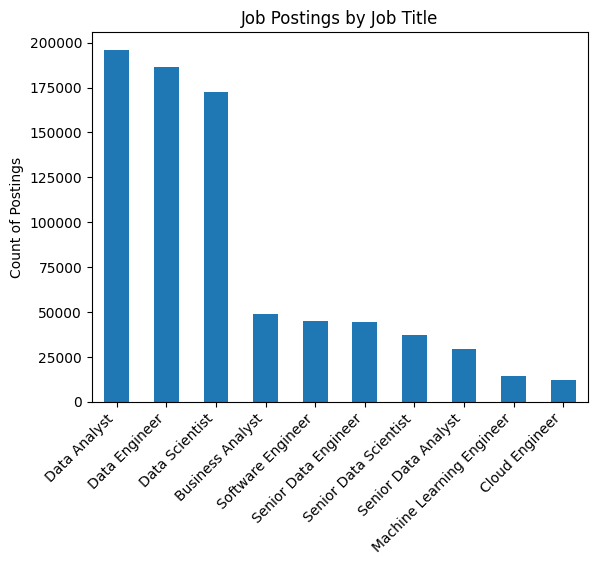

In [12]:
# Get Job Counts
job_counts = df.job_title_short.value_counts()

print(type(job_counts))

# Series Plot where initialized by pandas and then modified by Matplotlib
job_counts.plot(kind='bar')
plt.ylabel('Count of Postings')
plt.xlabel('')
plt.title('Job Postings by Job Title')
plt.xticks(rotation=45, ha='right')

plt.show()

## DataFrame Plot

In [18]:
print(type(df))

# Remove NA values from date and year avg
df[['job_posted_date', 'salary_year_avg']].dropna(subset=['salary_year_avg'])

<class 'pandas.core.frame.DataFrame'>


,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"['bash', 'python', 'oracle', 'aws', 'ansible',...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785736,Software Engineer,DevOps Engineer,Singapura,melalui Trabajo.org,Pekerjaan tetap,False,Singapore,2023-03-13 06:16:16,False,False,Singapore,None,NaN,NaN,CAREERSTAR INTERNATIONAL PTE. LTD.,"['bash', 'python', 'perl', 'linux', 'unix', 'k...","{'os': ['linux', 'unix'], 'other': ['kubernete..."
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,"['sas', 'sas', 'sql', 'excel']","{'analyst_tools': ['sas', 'excel'], 'programmi..."
785738,Business Analyst,Commercial Analyst - Start Now,Malaysia,melalui Ricebowl,Pekerjaan tetap,False,Malaysia,2023-03-12 06:32:36,False,False,Malaysia,None,NaN,NaN,Lendlease Corporation,"['powerpoint', 'excel']","{'analyst_tools': ['powerpoint', 'excel']}"
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,"['python', 'go', 'nosql', 'sql', 'mongo', 'she...","{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."


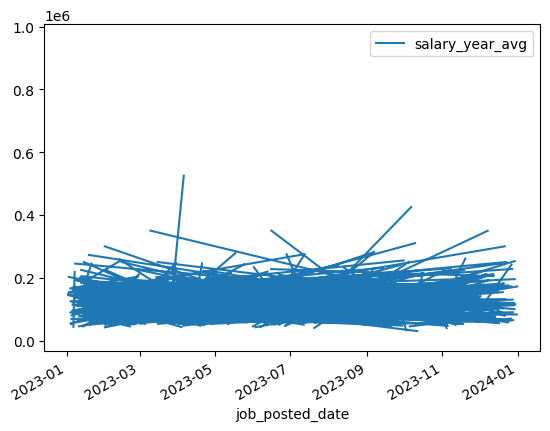

In [17]:
# Plot Time Series
df.plot(x='job_posted_date', y='salary_year_avg', kind='line')

plt.show()

# Problems

In [19]:
# Install datasets Library (if not already installed)
# !pip install datasets

# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

## Job Posting Location Bar Plot (1.31.1) - Problem

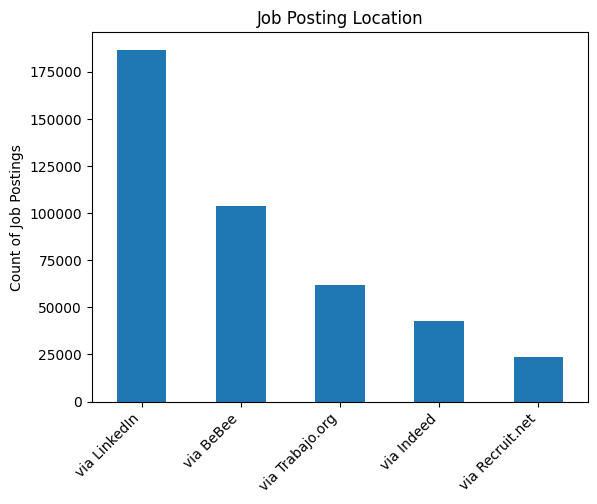

In [35]:

job_via_counts = df['job_via'].value_counts().head()

job_via_counts.plot(kind='bar')
plt.xlabel('')
plt.ylabel('Count of Job Postings')
plt.title('Job Posting Location')
plt.xticks(rotation=45, ha='right')
plt.show()

## Top Job Locations (1.31.2) - Problem

job_location
Anywhere                       69552
Singapore                      23415
Paris, France                  12311
Bengaluru, Karnataka, India    11474
London, UK                     10564
Name: count, dtype: int64


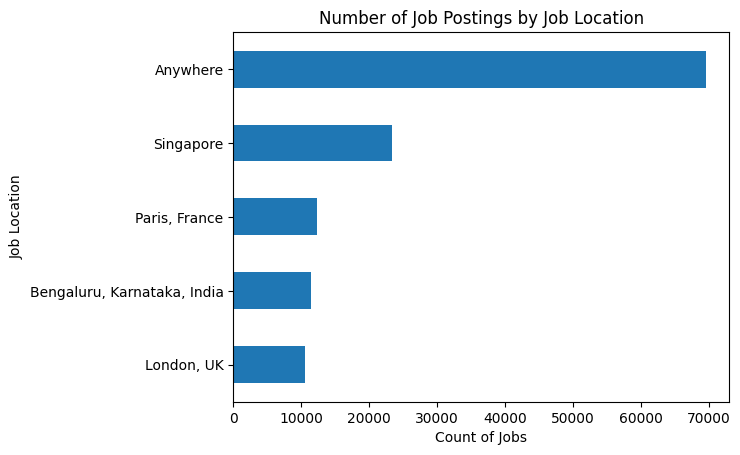

In [44]:
# barh
job_location_count = df.job_location.value_counts().head()

print(job_location_count)

job_location_count.sort_values(ascending=True).plot(kind='barh')
plt.xlabel('Count of Jobs')
plt.ylabel('Job Location')
plt.title('Number of Job Postings by Job Location')

plt.show()

## Job Postings Trend Line Plot (1.31.3) - Problem

job_posted_month
2023-01    91822
2023-02    64578
2023-03    64084
2023-04    62919
2023-05    52104
2023-06    61572
2023-07    63777
2023-08    75162
2023-09    62359
2023-10    66611
2023-11    64450
2023-12    56303
Freq: M, Name: count, dtype: int64


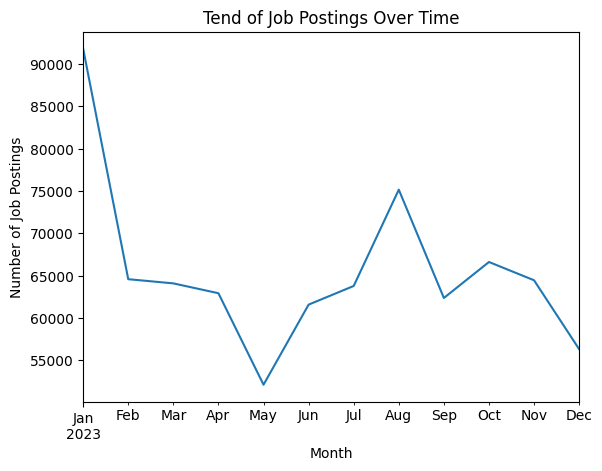

In [59]:
df['job_posted_month'] = df['job_posted_date'].dt.to_period('M')



monthly_job_counts = df['job_posted_month'].value_counts().sort_index()

print(monthly_job_counts)

monthly_job_counts.plot(kind='line')
plt.xlabel('Month')
plt.ylabel('Number of Job Postings')
plt.title('Tend of Job Postings Over Time')

plt.show()

# Exercise - Matplotlib Basics